💡 statsmodels를 이용한 선형 회귀 분석 (OLS)


1. **OLS(Ordinary Least Squares)**는 

- 회귀 모델의 가장 기본적인 형태로, 

- 예측값과 실제값의 차이(오차)를 최소화하는 최적의 직선(회귀선)을 찾는 통계적 기법입니다.


2. statsmodels는 

- OLS와 같은 통계 모델을 구축하고, 그 결과를 통계적으로 해석하는 데 특화된 라이브러리입니다. 

- 특히, 모델의 요약(Summary) 결과를 통해 각 변수가 결과에 미치는 영향이 통계적으로 유의미한지, 

  모델이 데이터를 얼마나 잘 설명하는지(R-squared) 등을 상세하게 파악할 수 있습니다.

- sm.add_constant() 함수는 모델의 절편(Intercept) 역할을 하는 상수항을 독립 변수에 명시적으로 추가해주는 역할을 합니다.

======

💻 실습 목표:

- 아래 코드는 가상의 데이터를 생성하여 statsmodels로 OLS 회귀 모델을 학습하고, 

- results.summary()를 통해 모델의 통계적 결과를 해석하는 과정을 보여줍니다.

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1377.
Date:                Wed, 06 Aug 2025   Prob (F-statistic):           6.28e-72
Time:                        17:16:32   Log-Likelihood:                -210.27
No. Observations:                 100   AIC:                             426.5
Df Residuals:                      97   BIC:                             434.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5445      0.519      8.755      0.0

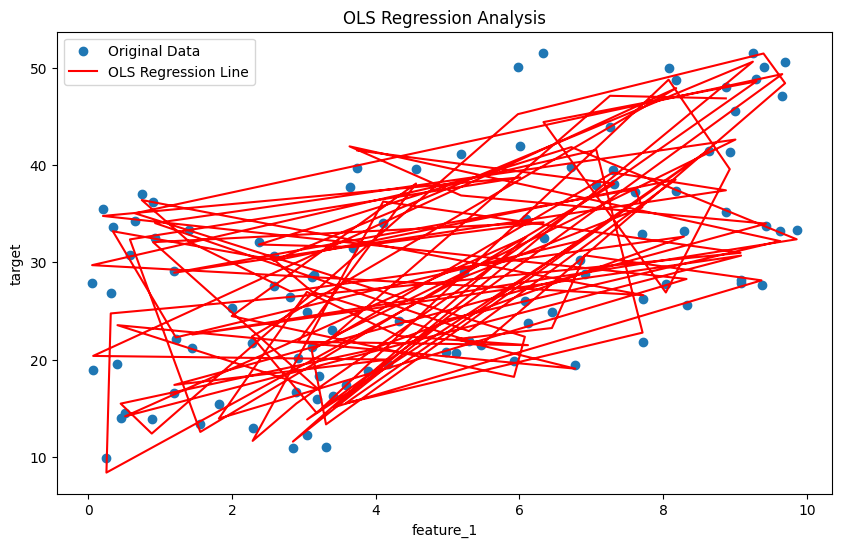

In [2]:
# ------------------------- [필요한 라이브러리 임포트] -------------------------
# pandas: 데이터프레임(DataFrame)을 다루기 위한 라이브러리. 데이터 구조화에 사용됩니다.
import pandas as pd
# numpy: 수치 계산, 특히 배열(array)을 다루기 위한 라이브러리. 가상 데이터 생성에 사용됩니다.
import numpy as np
# statsmodels.api as sm: 통계 모델을 구축하고 분석하기 위한 핵심 라이브러리.
# OLS, 로지스틱 회귀 등 다양한 통계 모델을 제공합니다.
import statsmodels.api as sm
# matplotlib.pyplot as plt: 데이터 시각화를 위한 라이브러리. 그래프를 그리는 데 사용됩니다.
import matplotlib.pyplot as plt


# ------------------------- [1. 가상 데이터 생성] -------------------------
# 독립 변수(X)와 종속 변수(y) 생성
# 특성 2개와 상수항을 포함한 데이터
np.random.seed(42)  # 재현 가능한 결과를 위해 난수 시드(seed)를 고정합니다.
# 100행 2열의 무작위 숫자를 생성합니다. (0~10 사이)
X = np.random.rand(100, 2) * 10
# y = 2 * x1 + 3 * x2 + 5 + noise 형태의 종속 변수 y를 생성합니다.
# np.random.randn(100) * 2는 정규분포를 따르는 무작위 노이즈를 추가하여 데이터에 현실성을 더합니다.
y = 2 * X[:, 0] + 3 * X[:, 1] + 5 + np.random.randn(100) * 2

# ------------------------- [2. 데이터프레임으로 변환] -------------------------
# statsmodels은 pandas 데이터프레임과 호환이 잘 됩니다.
# numpy 배열 X를 'feature_1', 'feature_2'라는 이름의 컬럼을 가진 데이터프레임으로 변환합니다.
df = pd.DataFrame(data=X, columns=['feature_1', 'feature_2'])
# 생성한 종속 변수 y를 'target'이라는 새로운 컬럼으로 데이터프레임에 추가합니다.
df['target'] = y

# ------------------------- [3. OLS 모델 정의 및 학습] -------------------------
# statsmodels는 회귀 모델에 상수항(절편)을 자동으로 추가하지 않으므로,
# `sm.add_constant` 함수를 사용해 상수항을 명시적으로 추가해줍니다.
# OLS 모델은 y = b0 + b1*x1 + b2*x2 형태인데, 여기서 b0가 절편(상수항)입니다.
# 이 코드를 통해 X에 'const'라는 이름의 상수항 컬럼이 추가됩니다.
X = sm.add_constant(df[['feature_1', 'feature_2']])
y = df['target'] # 학습에 사용할 종속 변수(y)를 설정합니다.

# OLS 모델을 정의합니다. (종속변수 y, 독립변수 X)
model = sm.OLS(y, X)

# 모델 학습(fitting)을 시작하고 결과를 results 객체에 저장합니다.
results = model.fit()

# ------------------------- [4. 모델 결과 요약 출력] -------------------------
# 모델 학습 결과를 요약해서 출력합니다.
# 이 요약은 p-value, R-squared, 계수 등 중요한 통계적 정보를 담고 있습니다.
print(results.summary())

# ------------------------- [5. 시각화 (선택 사항)] -------------------------
# 한글 폰트 설정은 사용자 환경에 맞게 추가해야 합니다.
# (예: plt.rcParams['font.family'] = 'NanumGothic')

# feature_1과 y의 관계를 시각화 (회귀선 추가)
plt.figure(figsize=(10, 6))
# 산점도(scatter plot)를 그려 원래 데이터의 분포를 시각화합니다.
plt.scatter(df['feature_1'], df['target'], label='Original Data')
# OLS 모델이 예측한 값을 기반으로 회귀선(빨간색 선)을 그립니다.
# results.predict(X)는 학습된 모델이 X를 바탕으로 예측한 y 값입니다.
plt.plot(df['feature_1'], results.predict(X), color='red', label='OLS Regression Line')
plt.title('OLS Regression Analysis')
plt.xlabel('feature_1')
plt.ylabel('target')
plt.legend() # 범례를 표시합니다.
plt.show() # 그래프를 화면에 표시합니다.